In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline





/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/notebook8500950c60/__results__.html
/kaggle/input/notebook8500950c60/submission.csv
/kaggle/input/notebook8500950c60/__notebook__.ipynb
/kaggle/input/notebook8500950c60/__output__.json
/kaggle/input/notebook8500950c60/custom.css
/kaggle/input/notebook8500950c60/__results___files/__results___8_0.png
/kaggle/input/notebook8500950c60/__results___files/__results___11_7.png
/kaggle/input/notebook8500950c60/__results___files/__results___9_2.png
/kaggle/input/notebook8500950c60/__results___files/__results___8_3.png
/kaggle/input/notebook8500950c60/__results___files/__results___11_5.png
/kaggle/input/notebook8500950c60/__results___files/__results___8_4.png
/kaggle/input/notebook8500950c60/__results___files/__results___11_3.png
/kaggle/input/notebook8500950c60/__results___files/__results___11_9.png
/kaggle/input/notebook8500950c60/__results___files/__results___11_1.png
/kaggl

In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
test_ids = test["PassengerId"]
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print('--'*25)
print('The shape of the train data is : {}'.format(train.shape))
print('--'*25)
print('The shape of the test data is     : {}'.format(test.shape))
print('--'*25)

--------------------------------------------------
The shape of the train data is : (891, 12)
--------------------------------------------------
The shape of the test data is     : (418, 11)
--------------------------------------------------


In [5]:
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
women = train.loc[train.Sex == 'female']['Survived']
rateW = sum(women)/ len(women)
print('Percentage of women survived', rateW)

Percentage of women survived 0.7420382165605095


In [7]:
men = train.loc[train.Sex =='male']['Survived']
rateM = sum(men)/len(men)
print('Percentage of women survived', rateM)

Percentage of women survived 0.18890814558058924


In [8]:
num = train[['Parch', 'Age','SibSp','Fare','Pclass']]
cat = train[['Sex', 'Survived','Ticket','Cabin','Embarked']]


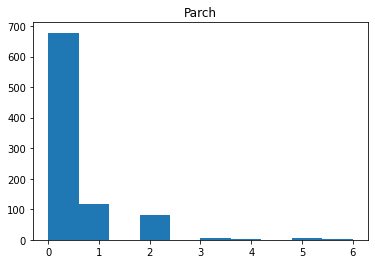

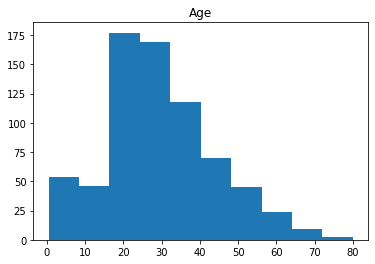

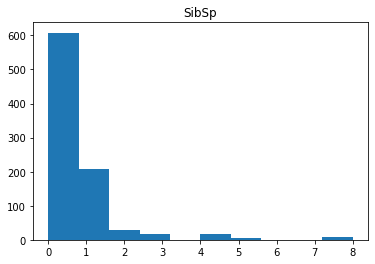

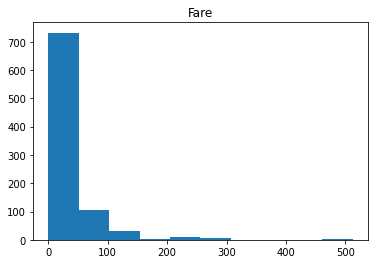

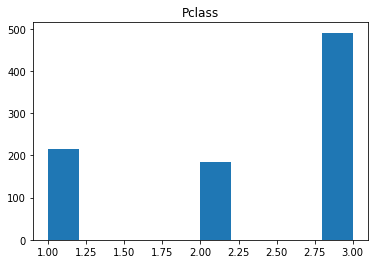

In [9]:
for i in num.columns:
    plt.hist(num[i])
    plt.title(i)
    plt.show()

           Parch       Age     SibSp      Fare    Pclass
Parch   1.000000 -0.189119  0.414838  0.216225  0.018443
Age    -0.189119  1.000000 -0.308247  0.096067 -0.369226
SibSp   0.414838 -0.308247  1.000000  0.159651  0.083081
Fare    0.216225  0.096067  0.159651  1.000000 -0.549500
Pclass  0.018443 -0.369226  0.083081 -0.549500  1.000000


<AxesSubplot:>

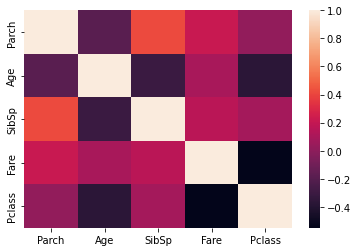

In [10]:
import seaborn as sns 
print(num.corr())
 
sns.heatmap(num.corr())

In [11]:
pd.pivot_table(train, index= 'Survived', values =['Age','Parch','SibSp','Fare','Pclass'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


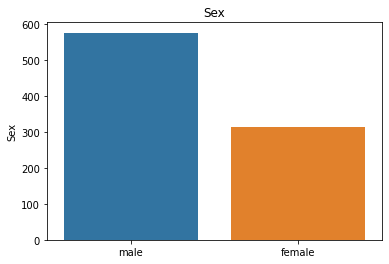

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


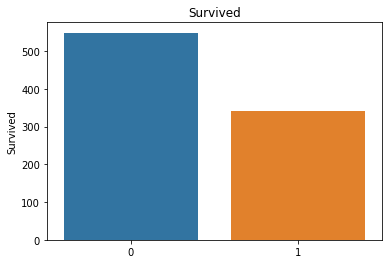

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


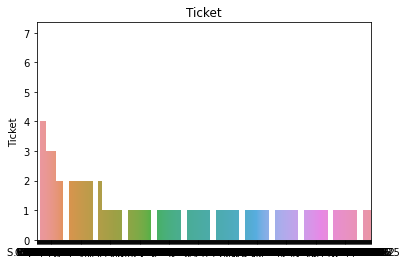

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


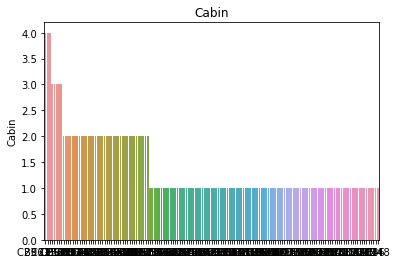

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


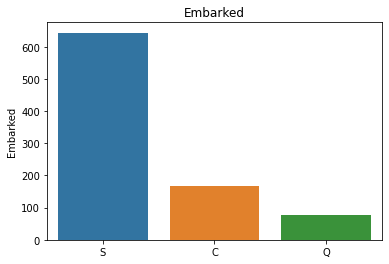

In [12]:
for i in cat.columns:
    sns.barplot(cat[i].value_counts().index,cat[i].value_counts()).set_title(i)
    plt.show()

In [13]:

print(pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print(pd.pivot_table(train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print(pd.pivot_table(train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))
 

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119
Sex       female  male
Survived              
0             81   468
1            233   109
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [14]:
train['Embarked'].fillna(value='S', inplace=True)

In [15]:
mean_age_miss = train[train ["Name"].str.contains('Miss.', na=False)]['Age'].median().round()
mean_age_mrs = train[train["Name"].str.contains('Mrs.', na=False)]['Age'].median().round()
mean_age_mr = train[train["Name"].str.contains('Mr.', na=False)]['Age'].median().round()
mean_age_master = train[train["Name"].str.contains('Master.', na=False)]['Age'].median().round()
mean_age_mrs

35.0

In [16]:

cat.Cabin
train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [17]:
pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [18]:
train['cabin_adv'] = train.Cabin.apply(lambda x: str(x)[0])

In [19]:
#comparing surivial rate by cabin
print(train.cabin_adv.value_counts())
pd.pivot_table(train,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


Clean and fill the data

In [20]:
def clean(train):

    train = train.drop(["Cabin","Ticket","Name"], axis = 1)
    cols = ["Pclass","SibSp","Parch","Age","Fare"]
    for col in cols:
        train[col].fillna(train[col].median(),inplace = True)
    return train

train = clean(train)
test = clean(test)

In [21]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv
0,1,0,3,male,22.0,1,0,7.2500,S,0,n
1,2,1,1,female,38.0,1,0,71.2833,C,1,C
2,3,1,3,female,26.0,0,0,7.9250,S,0,n
3,4,1,1,female,35.0,1,0,53.1000,S,1,C
4,5,0,3,male,35.0,0,0,8.0500,S,0,n
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0,n
887,888,1,1,female,19.0,0,0,30.0000,S,1,B
888,889,0,3,female,28.0,1,2,23.4500,S,0,n
889,890,1,1,male,26.0,0,0,30.0000,C,1,C


Checking the Missing Values

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Sex             891 non-null    object 
 4   Age             891 non-null    float64
 5   SibSp           891 non-null    int64  
 6   Parch           891 non-null    int64  
 7   Fare            891 non-null    float64
 8   Embarked        891 non-null    object 
 9   cabin_multiple  891 non-null    int64  
 10  cabin_adv       891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [23]:
print(train.isnull().sum())

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Embarked          0
cabin_multiple    0
cabin_adv         0
dtype: int64


In [24]:
print(test.isnull().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


Turning string in Integer

In [26]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
cols = ["Sex","Embarked"]

for col in cols: 
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
    print(le.classes_)
train.head()

['female' 'male']
['C' 'Q' 'S']


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,cabin_multiple,cabin_adv
0,1,0,3,1,22.0,1,0,7.2500,2,0,n
1,2,1,1,0,38.0,1,0,71.2833,0,1,C
2,3,1,3,0,26.0,0,0,7.9250,2,0,n
3,4,1,1,0,35.0,1,0,53.1000,2,1,C
4,5,0,3,1,35.0,0,0,8.0500,2,0,n


In [27]:
print(train, "cabin_adv")

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    1  22.0      1      0   7.2500   
1              2         1       1    0  38.0      1      0  71.2833   
2              3         1       3    0  26.0      0      0   7.9250   
3              4         1       1    0  35.0      1      0  53.1000   
4              5         0       3    1  35.0      0      0   8.0500   
..           ...       ...     ...  ...   ...    ...    ...      ...   
886          887         0       2    1  27.0      0      0  13.0000   
887          888         1       1    0  19.0      0      0  30.0000   
888          889         0       3    0  28.0      1      2  23.4500   
889          890         1       1    1  26.0      0      0  30.0000   
890          891         0       3    1  32.0      0      0   7.7500   

     Embarked  cabin_multiple cabin_adv  
0           2               0         n  
1           0               1         C  
2        

Train data and Test

In [28]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['PassengerId','Sex','Age','SibSp','Embarked']])
y = np.asanyarray(train[['Survived']])
y_ = np.asanyarray(train[['Survived']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ' , regr.intercept_)

Coefficients:  [[ 2.91085558e-05 -5.50234572e-01 -1.75293324e-03 -4.42505189e-02
  -6.35661505e-02]]
Intercept:  [0.89946083]


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = train["Survived"]
x = train.drop(["Survived","cabin_adv"], axis=1)
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.15, random_state= 4)

In [30]:
clf = LogisticRegression(random_state= 4, max_iter = 10000).fit(x_train, y_train)

In [31]:
prediction = clf.predict(x_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, prediction)

0.8283582089552238

In [32]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
